<a href="https://colab.research.google.com/github/vinaynayak2000/Bitcoin_Price_Visualization/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Bitcoin Price Visualization***

Installing the required packages

In [ ]:
!pip install forex-python
!pip install pandas



Importing the packages and initializing the class

In [ ]:
from forex_python.bitcoin import BtcConverter

b = BtcConverter()

Importing the datetime package and initializing the start and end date 


In [ ]:
from datetime import datetime

start =  datetime(2015,1,1)
end = datetime(2022,4,1)

Understanding the data 

In [ ]:
price_data = b.get_previous_price_list("CAD",start,end)

In [ ]:
len(price_data)

2648

In [ ]:
type(price_data)

dict

In [ ]:
import pandas as pd

prices = pd.DataFrame(price_data.items(), columns=["date","price"])

In [ ]:
prices = prices.set_index('date')

In [ ]:
prices.head()

,price
date,
2015-01-01,364.3523
2015-01-02,369.6788
2015-01-03,329.1688
2015-01-04,311.4075
2015-01-05,321.1521


In [ ]:
prices.loc["2017-01-01":"2017-12-31"]

,price
date,
2017-01-01,1340.6175
2017-01-02,1368.9983
2017-01-03,1383.9807
2017-01-04,1503.1519
2017-01-05,1330.8320
...,...
2017-12-27,19468.7381
2017-12-28,18136.3597
2017-12-29,18144.4879


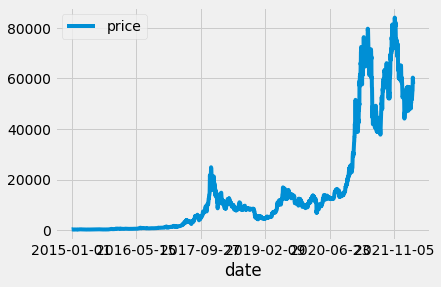

In [ ]:
prices.plot()


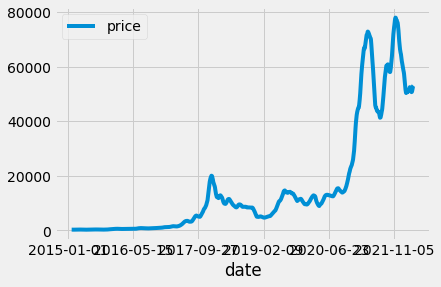

In [ ]:
prices.rolling(30).mean().plot()


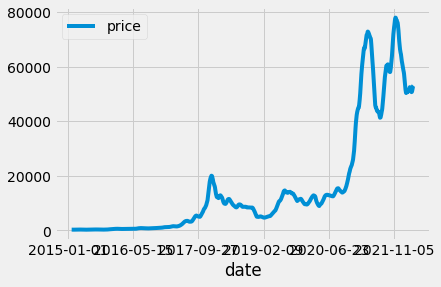

In [ ]:
import matplotlib.style as style

style.use('fivethirtyeight')

rolling = prices.rolling(30).mean()

rolling.plot()


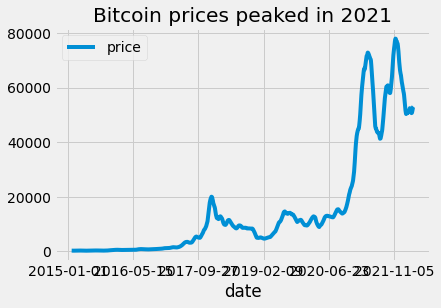

In [ ]:
import matplotlib.pyplot as plt

ax = rolling.plot()

plt.title("Bitcoin prices peaked in 2021")
plt.show()

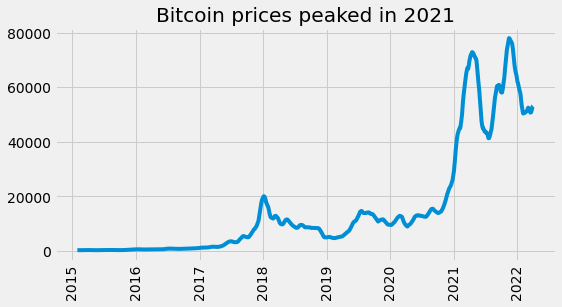

In [ ]:
from logging import root
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(rolling.index.values, rolling["price"], linewidth = 4)

ticks= ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
plt.title("Bitcoin prices peaked in 2021")
plt.xticks(ticks, rotation = "vertical")
ax.set_xticklabels(tick_labels)
plt.show()

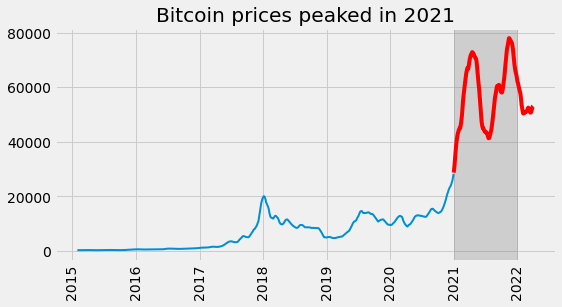

In [ ]:
pre_2021 = rolling.loc[:"2020-12-31"]
post_2021 = rolling.loc["2021-01-01":]

fig,ax = plt.subplots(figsize=(8,4))

ax.plot(pre_2021.index.values, pre_2021["price"], linewidth = 2)

ax.plot(post_2021.index.values, post_2021["price"], linewidth = 4, color = "red")

ax.axvspan(xmin = 2192, xmax = 361+2192, ymin = 0, alpha=0.3, color='grey')
ticks= ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
plt.title("Bitcoin prices peaked in 2021")
plt.xticks(ticks, rotation = "vertical")
ax.set_xticklabels(tick_labels)
plt.show()
